2024-07-13 23:07:58.140809: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 23:07:58.240796: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 23:07:58.241691: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-13 23:07:59.180702: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


11490434/11490434 [==============================] - 12s 1us/step


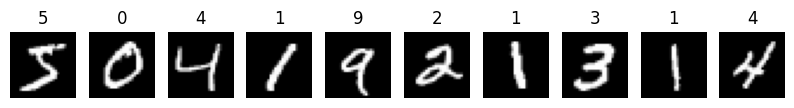

Epoch 1/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.5267 - accuracy: 0.8379 - val_loss: 0.1826 - val_accuracy: 0.9446
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2408 - accuracy: 0.9270 - val_loss: 0.1370 - val_accuracy: 0.9597
Epoch 3/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1943 - accuracy: 0.9402 - val_loss: 0.1156 - val_accuracy: 0.9649
Epoch 4/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1729 - accuracy: 0.9463 - val_loss: 0.1036 - val_accuracy: 0.9682
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1592 - accuracy: 0.9517 - val_loss: 0.0939 - val_accuracy: 0.9711
Epoch 6/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1437 - accuracy: 0.9549 - val_loss: 0.0874 - val_accuracy: 0.9736
Epoch 7/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1327 - accuracy: 0.9580 - val_loss: 0.0885 -

2024-07-13 23:10:51.492677: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1500/1500 [==============================] - 2s 1ms/step
Training Data - Accuracy: 0.9734583333333333, Precision: 0.97369021887433, Recall: 0.9731695659847261, F1 Score: 0.9731835168819767
375/375 [==============================] - 1s 1ms/step
Validation Data - Accuracy: 0.9725833333333334, Precision: 0.9727428887367273, Recall: 0.9721800746367141, F1 Score: 0.9722261312855751
313/313 [==============================] - 0s 1ms/step
Test Data - Accuracy: 0.9736, Precision: 0.9738719969235307, Recall: 0.9733379055581312, F1 Score: 0.973328053491838


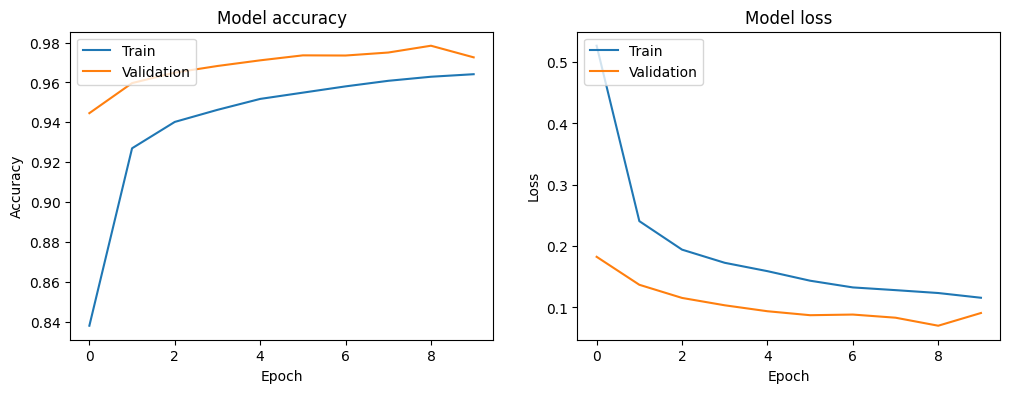

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualize the data
def plot_samples(data, labels, num_samples=10):
    plt.figure(figsize=(10, 1))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(data[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

plot_samples(x_train, y_train)

# Step 2: Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add a channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Apply image augmentations
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train)

# Step 4: Build a 3-layered neural network
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), 
                    validation_data=(x_val, y_val), epochs=10)

# Step 6: Evaluate the model
def evaluate_model(model, x_data, y_data):
    y_pred = model.predict(x_data)
    y_true = np.argmax(y_data, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='macro')
    recall = recall_score(y_true, y_pred_classes, average='macro')
    f1 = f1_score(y_true, y_pred_classes, average='macro')
    return accuracy, precision, recall, f1

# Evaluate on training data
train_metrics = evaluate_model(model, x_train, y_train)
print(f"Training Data - Accuracy: {train_metrics[0]}, Precision: {train_metrics[1]}, Recall: {train_metrics[2]}, F1 Score: {train_metrics[3]}")

# Evaluate on validation data
val_metrics = evaluate_model(model, x_val, y_val)
print(f"Validation Data - Accuracy: {val_metrics[0]}, Precision: {val_metrics[1]}, Recall: {val_metrics[2]}, F1 Score: {val_metrics[3]}")

# Evaluate on test data
test_metrics = evaluate_model(model, x_test, y_test)
print(f"Test Data - Accuracy: {test_metrics[0]}, Precision: {test_metrics[1]}, Recall: {test_metrics[2]}, F1 Score: {test_metrics[3]}")

# Visualization of training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
